In [1]:
# MNISTデータセットを取得
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist
# DESCR データセットの説明
# data インスタンスごとに１行、特徴量毎に１列の配列
# target ラベルの配列を格納


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
# MNISTデータを分割
X, y = mnist["data"],mnist["target"]
# Xに訓練データをyにラベルデータを格納

In [3]:
X.shape
# 70000行で特徴量784の行列(28x28=784)

(70000, 784)

In [4]:
y.shape
# 70000行のラベルデータ

(70000,)

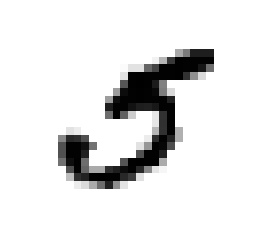

In [5]:
# サンプルデータの抽出
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] #36000個目のデータを抽出
some_digit_image = some_digit.reshape(28,28) # 28x28の配列に変換

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
# cm.binary 色指定
# interpolation = "nearest" 描画をタイル状に表示
plt.axis("off") 
# 28x28 のグラフ上に表示するかを設定 offはイメージだけ表示
plt.show()

In [6]:
y[36000]
# 36000行目のラベルは何ですか？

5.0

In [7]:
# MNISTのデータを訓練用と検証用に分割。ラベルデータもあるので訓練データに対応する形で分割
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train : 1～60000の訓練用データ
# X_test : 60000～LASTまでの検証用データ 
# y_train : 1～60000のラベルデータ X_trainと対応する
# y_test : 60000～LASTまでの検証用データ X_testと対応する


In [8]:
# 訓練データとそのラベルをシャッフル
import numpy as np
shuffle_index = np.random.permutation(60000)
# shuffle_index に 60000のintを渡している = 0～60000データ分のランダム値を作成
# つまり　permutation(5) = permutation(list(range(5)))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # 60000行分のランダム値でシャッフル


In [9]:
# 二項分類機の訓練
# 1個の数字だけを分類する機能を実装してみる
# 5に対してみはtrue,それ以外はfalse

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# SGD 確率的勾配降下法
# オンライン学習に向いている
# 非常に大きなデータも扱える
# SGDは訓練の無作為性に依存するため結果際限のためにはrandom_stateパラメータの設定が必要
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)  # 訓練の特徴量データにX_trainの60000件、ラベルデータにy_train_5　という5にだけ true が入ったデータ

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

In [11]:
# 
sgd_clf.predict([some_digit]) # 36000個めのデータを例に分類ができているか確認


array([ True])

In [12]:
# クロスバリデーションで精度を確認
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# cross_val_score(分類機、訓練データ、ラベルデータ、kfoldの数、精度の出し方)
# 上記一つでモデル精度を出すことができる

array([0.91715, 0.95595, 0.9085 ])

In [13]:
# すべての画像を「5以外」クラスに分類する分類機
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
# 精度がとても高いが、入力画像X_trainの10%が5以外なので　「いつも5以外」と予測しているに過ぎない
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91005, 0.90855, 0.91035])

In [15]:
# 混同行列による評価　の前準備
# cross_val_predict関数を使う。評価スコアではなく個々のテストフォールドに対する予測結果を返す
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
# 混同行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) # ラベルデータと予測のデータを設定
# 行：実際のクラス
# 列：予測したクラス
## 混同行列の図は当gitの配下に格納しています。「混同行列.png」
# 以下は5以外を分類するモデル
# 正しく５以外と分類されたもの　間違って5と分類されているもの 
# 間違って5以外と分類されているもの 正しく5と分類されているもの

array([[50816,  3763],
       [  605,  4816]], dtype=int64)

In [18]:
# 適合率と再現率とF値（調和平均)
# 適合率と再現率はトレードオフになる。
# 適合率：病気と予測された人のうち、本当に病気だった人の率
# 再現率：病気の人のうち、本当に病気と判定された率
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # 適合率


0.5613707891362629

In [19]:
recall_score(y_train_5, y_train_pred)    # 再現率

0.88839697472791

In [20]:
from sklearn.metrics import f1_score    # F値
f1_score(y_train_5, y_train_pred)

0.6880000000000001

In [21]:
# 適合率と再現率のトレードオフを見るのに、予測閾値を調整してみる
y_scores = sgd_clf.decision_function([some_digit])
y_scores
# 現在の閾値を出力

array([59972.73916291])

In [22]:
threshold = 0
# ↑により閾値を0 つまり、メソッドを同じ結果にしてみる
y_some_digit_pred = (y_scores > threshold)

In [23]:
y_some_digit_pred
# メソッドと同じ結果なので当然 trueが返る

array([ True])

In [24]:
# 閾値を200000に変えてみる。
# 今度は false が返る
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
# cross_val_predict() を使い、予測結果ではなく予測閾値をy_scrossにいれる
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [26]:
# y_scross をもとに全ての閾値の適合率と再現率を計算する
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

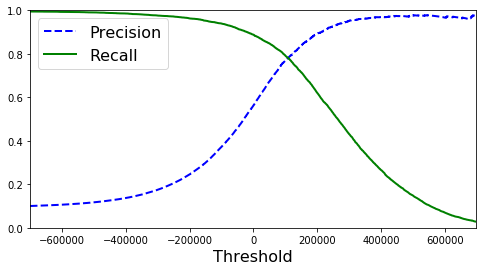

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.savefig("precision_recall_vs_threshold_plot")
plt.show()

In [29]:
# 適合率が90% になるようにモデルを調整してみる
(y_train_pred == (y_scores > 0)).all()

True

In [34]:
# 上記のグラフでは閾値200000位が適合率90%になっている
y_train_pred_90 = (y_scores > 200000)

In [35]:
# 適合率を確認してみる　高い数値が閾値を調整したので出る
precision_score(y_train_5, y_train_pred_90)

0.8936339522546419

In [36]:
# 再現率を確認してみる　低くなってしまっている
recall_score(y_train_5, y_train_pred_90)

0.6214720531267294

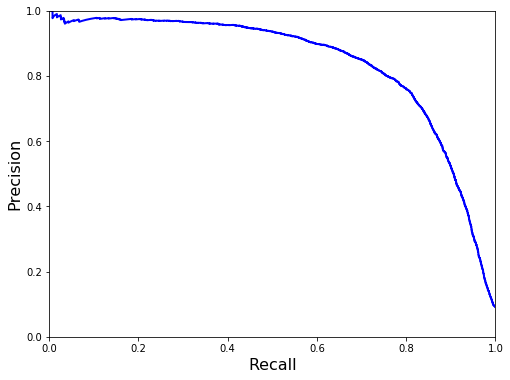

In [33]:
# 適合率を再現率をプロットしてみる
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.savefig("precision_vs_recall_plot")
plt.show()

In [37]:
# ROC曲線
# 擬陽性率に対する真陽性率をプロットする
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

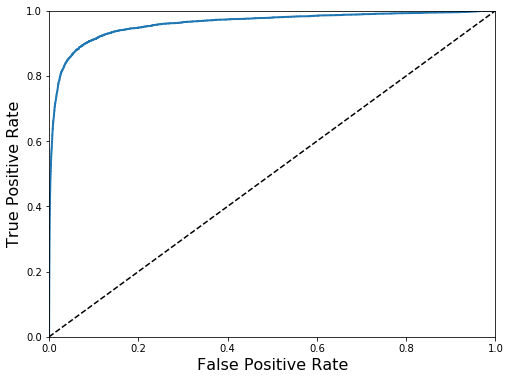

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.savefig("roc_curve_plot")
plt.show()

In [39]:
# AUCの出し方
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604851692345222

In [ ]:
# ROC曲線とPR曲線(Precion(適合率)R(Recall))の使い分け
# PR曲線の使いどころ：陽性クラスが珍しい、偽陰性よりも擬陽性が気になる場合
# 今回の例ではROC曲線だと好スコアだが、PR曲線で見ると改善可能なスコアである。これは陽性(5)が陰性(5以外)より少ないため


In [40]:
# アルゴリズムによる比較
# RandomForestで二項分類を実施してみ二つのモデルを比較してみる
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
# predict_proba は インスタンスあたり1行でクラス当たり1列の配列を返す
# 個々の要素はインスタンスが分類されたクラスに属する確率となる(5の確率は 70% など )

C:\Anaconda3\envs\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
# ROC曲線に必要なのは確率ではなくスコアなので陽性クラスの確率をスコアとして使用する
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

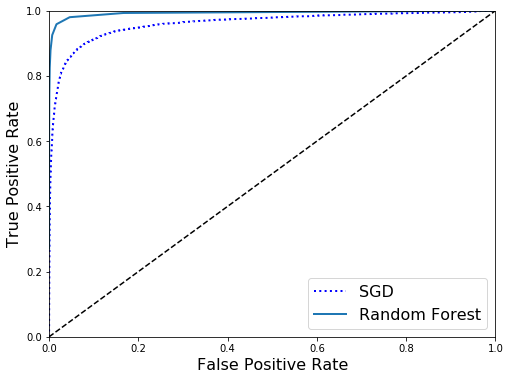

In [42]:
# ROC曲線による比較
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")#SGD曲線
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") #RandomForest曲線
plt.legend(loc="lower right", fontsize=16)
plt.savefig("roc_curve_comparison_plot")
plt.show()

In [43]:
# RandomFoestのAUCを算出
roc_auc_score(y_train_5, y_scores_forest)

0.9928389960361306

In [44]:
# 適合率
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9822173435784852

In [45]:
# 再現率
recall_score(y_train_5, y_train_pred_forest)

0.8253089835823649

In [46]:
# 多クラス分類
# 二項分類機に多クラス分類をさせる方法は二つ
# OVA法：それぞれの分類(0や1)などの検出器を訓練し、一番高いスコアを出した分類機のクラスを選ぶ
# OVO法：0と1、1と2など二つ一組の二項分類機を訓練する。MNISTの場合は(N(N-1))=45の分類器ができる
# scikit-learnでは自動でOVA法になる。
sgd_clf.fit(X_train, y_train) # 実際は10個の二項分類器を訓練している
sgd_clf.predict([some_digit])

array([5.])

In [47]:
# 上記のスコアを実際に見てみる
# 5の数値が一番スコアが高い
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-183675.27103524, -603594.81078121, -308957.52711128,
        -189481.43707316, -374305.41160943,   59972.73916291,
        -920098.79452587, -262845.06472812, -779654.63778567,
        -471944.78633039]])

In [48]:
np.argmax(some_digit_scores)

5

In [49]:
# 二項分類器かつscikit-learnに強制的にOVO法を適用する
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [50]:
# OVO法による予測器の数
len(ovo_clf.estimators_)

45

In [51]:
# 多項分類に対応しているRandomForestで多項分類を行う
forest_clf.fit(X_train, y_train) #訓練データ、ラベルデータ
forest_clf.predict([some_digit]) #36000個目の訓練データの予測

array([5.])

In [52]:
# 上記の予測確率
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [53]:
# 分類器の評価
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87847431, 0.86384319, 0.88018203])

In [54]:
# 入力の特徴量をスケーリングして適合率があがるか見てみる P.64(第二章)　
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90911818, 0.90844542, 0.91108666])

In [55]:
# 誤分類の分析
# 正直あまり役に立たないと思う。
# SGDで多項分類を行い、混同行列を表示してみる
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5742,    5,   18,   10,   11,   48,   41,    8,   37,    3],
       [   2, 6499,   49,   28,    5,   36,    8,    9,   95,   11],
       [  54,   48, 5311,  109,   85,   27,   93,   59,  157,   15],
       [  44,   41,  136, 5382,    3,  217,   36,   51,  135,   86],
       [  20,   28,   44,    9, 5357,   13,   55,   32,   81,  203],
       [  64,   44,   39,  192,   72, 4597,  107,   27,  192,   87],
       [  33,   25,   42,    2,   41,   95, 5622,   10,   47,    1],
       [  25,   23,   75,   30,   45,    9,    4, 5801,   17,  236],
       [  58,  162,   71,  178,   16,  152,   54,   25, 5000,  135],
       [  42,   39,   24,   90,  157,   38,    2,  211,   84, 5262]],
      dtype=int64)

In [56]:
# 混同行列をイメージにプロットしてみる
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

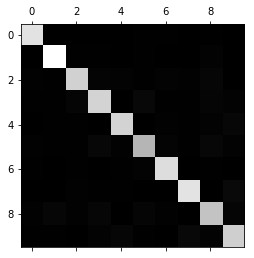

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot", tight_layout=False)
plt.show()
# 5 の分類が暗く見えるのは元画像に5が少ないか、分類器の性能が低かったか

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

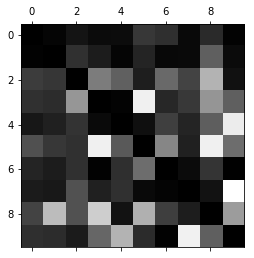

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()
# 行が実際のクラス、列が予測クラス
# 8,9が明るいのは他と混同されていることを表す、逆に1が暗いのは正確に予測できていることを表す

# 解決方法として、閉じた輪の数を数えるアルゴリズムを作る、画像を前処理するなどする

In [60]:
# 多ラベル分類　1つのインスタンスに二つ以上のラベルを付ける場合
# 具体的には１枚の写真に人(hoge.monya)が写っているインスタンスがあったとして、hoge,fuga,monyaを分類するモデルの場合
# [1,0,1] が出力されるのが正解となる
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # 7,8,9かどうか
y_train_odd = (y_train % 2 == 1) # 奇数かどうか
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier() # 多ラベル分類をサポートする分類器
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
# 36000個目のデータ(つまり「5」)の多ラベル分類の結果
knn_clf.predict([some_digit]) # 7,8,9かどうかはfalse、奇数かどうかはtrueが返る

array([[False,  True]])

In [ ]:
# 多ラベル分類の評価　
# 以下のように個々のラベルのF値を測り平均値を出す
#すんごい時間がかかる処理だそうなのでコメント化
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
#f1_score(y_multilabel, y_train_knn_pred, average="macro")

# ラベルごとに重要度や頻度が異なる場合は　average="weighted" を指定すること

In [ ]:
# 多出力分類
# あまり気にしないでいいかな。単純に個々のラベルが多クラスでもよいという形に多ラベル分類を一般化したもの


In [62]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [68]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

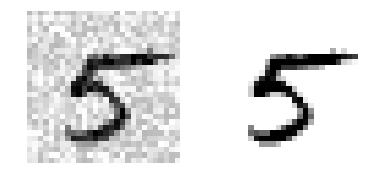

In [69]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.savefig("noisy_digit_example_plot")
plt.show()

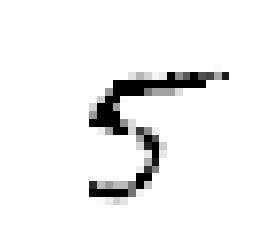

In [71]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
plt.savefig("cleaned_digit_example_plot")